In [104]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("../data/housing.csv")

In [106]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [107]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [108]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [109]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [111]:
data.dropna(inplace= True)

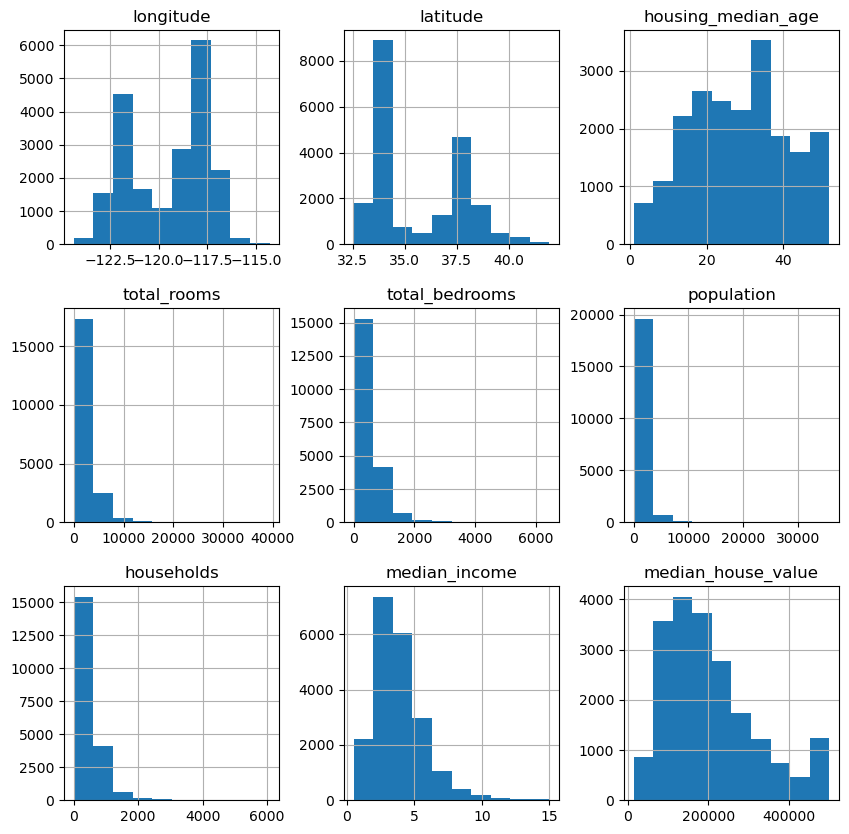

In [112]:
data.hist(figsize=(10, 10));

#### since 4 features are highly skewed so we have to do the log transform

| Feature          | Reason to Log Transform                     |
| ---------------- | ------------------------------------------- |
| `total_rooms`    | Strong right-skew, large range              |
| `total_bedrooms` | Similar pattern to total\_rooms             |
| `population`     | Strong right-skew                           |
| `households`     | Right-skew, follows similar trend to others |


In [113]:
data["log_total_rooms"] = np.log1p(data["total_rooms"])  # log1p(x) = log(1 + x), safe for 0
data["log_total_bedrooms"] = np.log1p(data["total_bedrooms"])
data["log_population"] = np.log1p(data["population"])
data["log_households"] = np.log1p(data["households"])

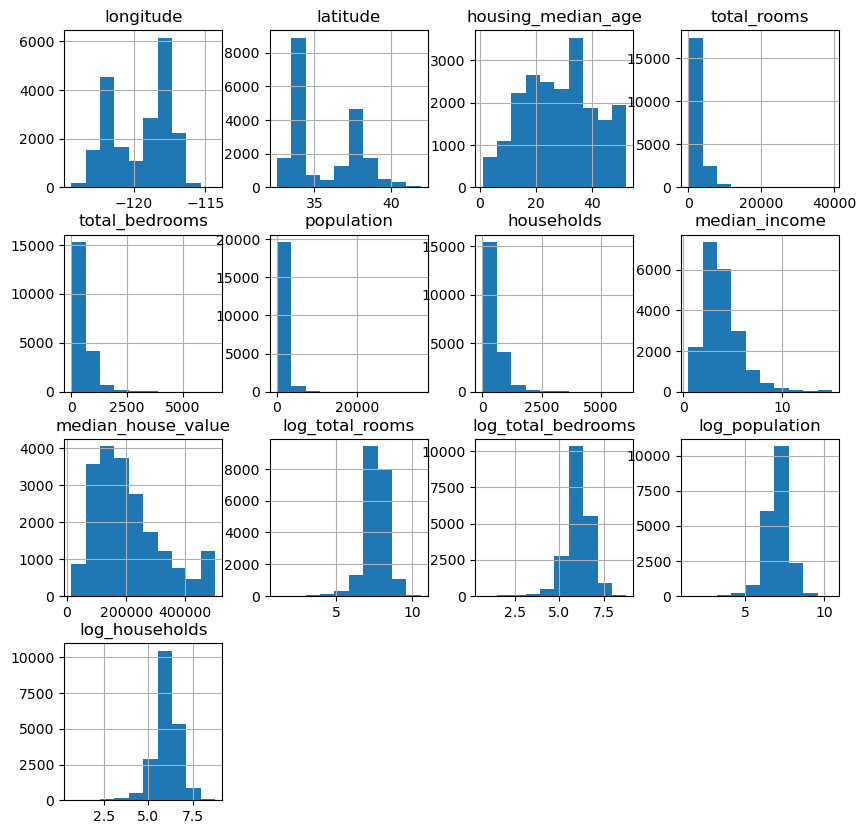

In [114]:
data.hist(figsize=(10, 10));

In [115]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_total_rooms,log_total_bedrooms,log_population,log_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.781058,4.867534,5.777652,4.844187
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,8.867850,7.009409,7.784057,7.037906
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.291656,5.252273,6.208590,5.181784
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,7.150701,5.463832,6.326149,5.393628
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,7.395108,5.638355,6.338594,5.560682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,7.418181,5.926926,6.740519,5.802118
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.548219,5.017280,5.877736,4.744932
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,7.720905,6.186209,6.915723,6.073045
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,7.528869,6.016157,6.609349,5.857933


In [116]:
data.drop('total_rooms', axis = 1, inplace= True)
data.drop("population", axis = 1, inplace= True)
data.drop('total_bedrooms', axis = 1, inplace = True)
data.drop("households", axis = 1, inplace= True)


In [117]:
data['rooms_per_household'] = data['log_total_rooms'] / (data['log_households'] )
data['bedrooms_per_room'] = data['log_total_bedrooms'] / (data['log_total_rooms'])
data['population_per_household'] = data['log_population'] / (data['log_households'] )


In [118]:
data

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,log_total_rooms,log_total_bedrooms,log_population,log_households,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,NEAR BAY,6.781058,4.867534,5.777652,4.844187,1.399834,0.717813,1.192698
1,-122.22,37.86,21.0,8.3014,358500.0,NEAR BAY,8.867850,7.009409,7.784057,7.037906,1.260013,0.790429,1.106019
2,-122.24,37.85,52.0,7.2574,352100.0,NEAR BAY,7.291656,5.252273,6.208590,5.181784,1.407171,0.720313,1.198157
3,-122.25,37.85,52.0,5.6431,341300.0,NEAR BAY,7.150701,5.463832,6.326149,5.393628,1.325768,0.764097,1.172893
4,-122.25,37.85,52.0,3.8462,342200.0,NEAR BAY,7.395108,5.638355,6.338594,5.560682,1.329892,0.762444,1.139895
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1.5603,78100.0,INLAND,7.418181,5.926926,6.740519,5.802118,1.278530,0.798973,1.161734
20636,-121.21,39.49,18.0,2.5568,77100.0,INLAND,6.548219,5.017280,5.877736,4.744932,1.380045,0.766205,1.238740
20637,-121.22,39.43,17.0,1.7000,92300.0,INLAND,7.720905,6.186209,6.915723,6.073045,1.271340,0.801228,1.138757
20638,-121.32,39.43,18.0,1.8672,84700.0,INLAND,7.528869,6.016157,6.609349,5.857933,1.285243,0.799078,1.128273


In [119]:
print(data.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', 'ocean_proximity', 'log_total_rooms',
       'log_total_bedrooms', 'log_population', 'log_households',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')


In [120]:
data = pd.get_dummies(data, columns = ['ocean_proximity'], drop_first= True, dtype=float)

<Axes: >

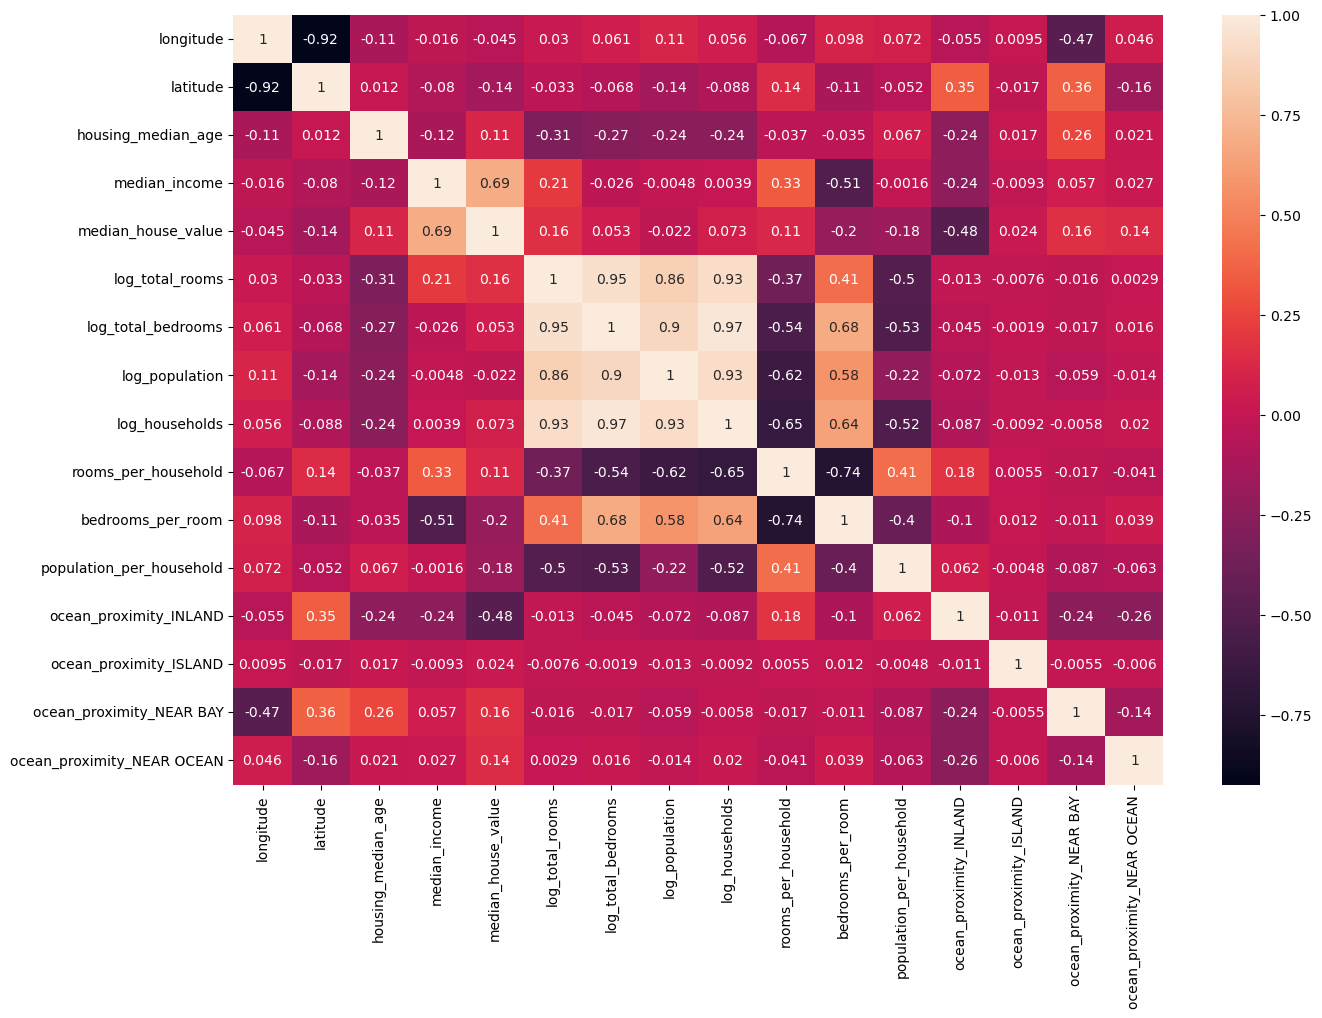

In [121]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

##### Now lets do Corelation Based Feature Selection(CBFS)

In [122]:
corr_matrix = data.corr(numeric_only = True)

target_corr = corr_matrix['median_house_value'].sort_values(ascending=False)
target_corr

median_house_value            1.000000
median_income                 0.688355
ocean_proximity_NEAR BAY      0.160526
log_total_rooms               0.158506
ocean_proximity_NEAR OCEAN    0.140378
rooms_per_household           0.114094
housing_median_age            0.106432
log_households                0.072765
log_total_bedrooms            0.053311
ocean_proximity_ISLAND        0.023525
log_population               -0.021904
longitude                    -0.045398
latitude                     -0.144638
population_per_household     -0.178536
bedrooms_per_room            -0.198690
ocean_proximity_INLAND       -0.484787
Name: median_house_value, dtype: float64

In [123]:
useful_features = target_corr[abs(target_corr)> 0.1].index.tolist()
useful_features.remove('median_house_value')
print('selected features:', useful_features)

selected features: ['median_income', 'ocean_proximity_NEAR BAY', 'log_total_rooms', 'ocean_proximity_NEAR OCEAN', 'rooms_per_household', 'housing_median_age', 'latitude', 'population_per_household', 'bedrooms_per_room', 'ocean_proximity_INLAND']


In [124]:
feature_corr = data[useful_features].corr()

In [125]:
feature_corr

,median_income,ocean_proximity_NEAR BAY,log_total_rooms,ocean_proximity_NEAR OCEAN,rooms_per_household,housing_median_age,latitude,population_per_household,bedrooms_per_room,ocean_proximity_INLAND
median_income,1.000000,0.056677,0.205800,0.027351,0.333041,-0.118278,-0.079626,-0.001551,-0.511493,-0.237536
ocean_proximity_NEAR BAY,0.056677,1.000000,-0.016499,-0.135819,-0.016914,0.256149,0.358785,-0.087399,-0.010831,-0.241356
log_total_rooms,0.205800,-0.016499,1.000000,0.002862,-0.370189,-0.313918,-0.032552,-0.500239,0.413025,-0.012862
ocean_proximity_NEAR OCEAN,0.027351,-0.135819,0.002862,1.000000,-0.041307,0.020797,-0.161342,-0.063136,0.038597,-0.262289
rooms_per_household,0.333041,-0.016914,-0.370189,-0.041307,1.000000,-0.037070,0.140709,0.410617,-0.740848,0.179471
housing_median_age,-0.118278,0.256149,-0.313918,0.020797,-0.037070,1.000000,0.011899,0.066585,-0.034734,-0.236968
latitude,-0.079626,0.358785,-0.032552,-0.161342,0.140709,0.011899,1.000000,-0.051893,-0.113840,0.351084
population_per_household,-0.001551,-0.087399,-0.500239,-0.063136,0.410617,0.066585,-0.051893,1.000000,-0.398743,0.061664
bedrooms_per_room,-0.511493,-0.010831,0.413025,0.038597,-0.740848,-0.034734,-0.113840,-0.398743,1.000000,-0.102184
ocean_proximity_INLAND,-0.237536,-0.241356,-0.012862,-0.262289,0.179471,-0.236968,0.351084,0.061664,-0.102184,1.000000


In [126]:
to_drop = set()
for i in range(len(feature_corr.columns)):
    for j in range(i):
        if abs(feature_corr.iloc[i, j]) > 0.9:
            colname_i = feature_corr.columns[i]
            colname_j = feature_corr.columns[j]
            to_drop.add(colname_j)
final_features = [f for f in useful_features if f not in to_drop]
print('Final features after removing multicollinearity:', final_features)


Final features after removing multicollinearity: ['median_income', 'ocean_proximity_NEAR BAY', 'log_total_rooms', 'ocean_proximity_NEAR OCEAN', 'rooms_per_household', 'housing_median_age', 'latitude', 'population_per_household', 'bedrooms_per_room', 'ocean_proximity_INLAND']


In [127]:
final_features

['median_income',
 'ocean_proximity_NEAR BAY',
 'log_total_rooms',
 'ocean_proximity_NEAR OCEAN',
 'rooms_per_household',
 'housing_median_age',
 'latitude',
 'population_per_household',
 'bedrooms_per_room',
 'ocean_proximity_INLAND']

In [128]:
selected_feature = ['median_income',
 'ocean_proximity_NEAR BAY',
 'log_total_rooms',
 'ocean_proximity_NEAR OCEAN',
 'rooms_per_household',
 'housing_median_age',
 'latitude',
 'population_per_household',
 'bedrooms_per_room',
 'ocean_proximity_INLAND']

x = data[selected_feature]
y = data["median_house_value"]

In [129]:
x

,median_income,ocean_proximity_NEAR BAY,log_total_rooms,ocean_proximity_NEAR OCEAN,rooms_per_household,housing_median_age,latitude,population_per_household,bedrooms_per_room,ocean_proximity_INLAND
0,8.3252,1.0,6.781058,0.0,1.399834,41.0,37.88,1.192698,0.717813,0.0
1,8.3014,1.0,8.867850,0.0,1.260013,21.0,37.86,1.106019,0.790429,0.0
2,7.2574,1.0,7.291656,0.0,1.407171,52.0,37.85,1.198157,0.720313,0.0
3,5.6431,1.0,7.150701,0.0,1.325768,52.0,37.85,1.172893,0.764097,0.0
4,3.8462,1.0,7.395108,0.0,1.329892,52.0,37.85,1.139895,0.762444,0.0
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,0.0,7.418181,0.0,1.278530,25.0,39.48,1.161734,0.798973,1.0
20636,2.5568,0.0,6.548219,0.0,1.380045,18.0,39.49,1.238740,0.766205,1.0
20637,1.7000,0.0,7.720905,0.0,1.271340,17.0,39.43,1.138757,0.801228,1.0
20638,1.8672,0.0,7.528869,0.0,1.285243,18.0,39.43,1.128273,0.799078,1.0


In [130]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [132]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 4966117116.27
R^2: 0.64


In [133]:
print(f"RMSE: {np.sqrt(mse):,.2f}")

RMSE: 70,470.68


In [134]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

print("R^2:", r2_score(y_test, y_pred))


R^2: 0.6368476562420202


In [135]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

print("R^2 lasso:", r2_score(y_test, y_pred))


R^2 lasso: 0.6368525412594195


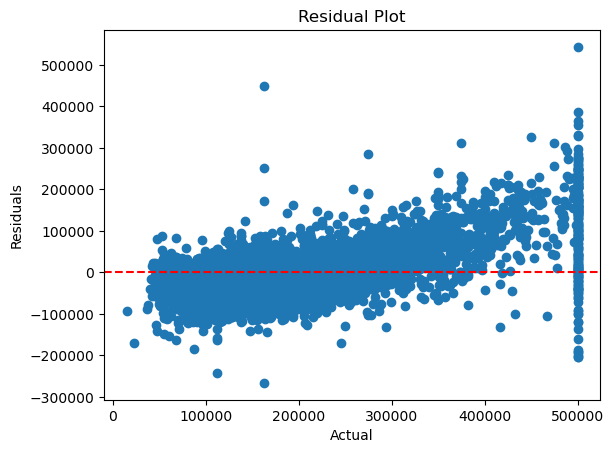

In [136]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()


In [137]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("R^2 (Random Forest):", r2_score(y_test, y_pred_rf))


R^2 (Random Forest): 0.7792361817775731


In [138]:
# reseduals 
rf_residuals = y_test - y_pred_rf

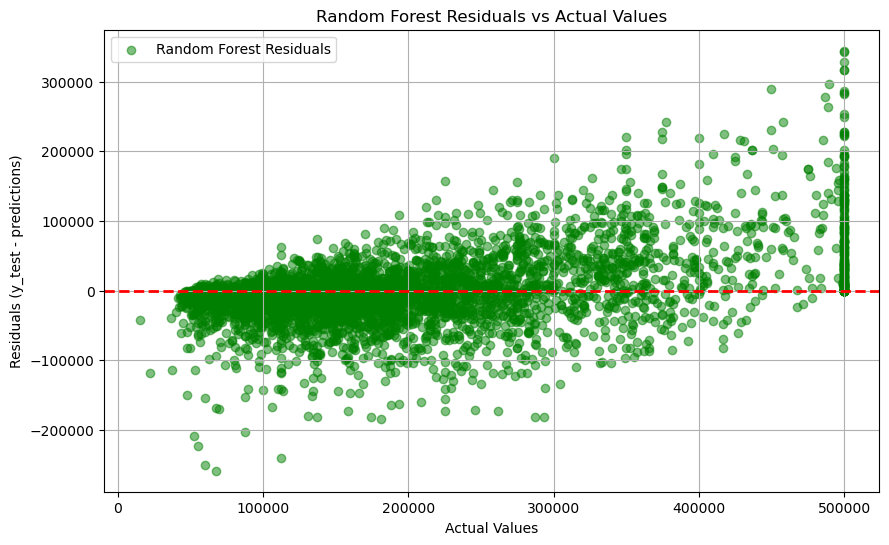

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_residuals, alpha=0.5, color='green', label='Random Forest Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (y_test - predictions)')
plt.title('Random Forest Residuals vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()
